In [1]:
# WIP

In [2]:
# V 1.13
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

# Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
})


Loading BokehJS ...

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'none',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.

In [4]:
df = pd.read_csv(ZipFile('data/student-alcohol-consumption.zip').open('student-mat.csv'))
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [5]:
df.shape

(395, 33)

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
new_columns = ['school', 'sex', 'age', 'address', 'familySize',
               'pStatus', 'mEdu', 'fEdu', 'mJob', 'fJob',
              'reason', 'guardian', 'travelTime', 'studyTime', 'failures',
              'schoolSupport', 'familySupport', 'paid', 'activities', 'nursery',
              'higher', 'internet', 'romantic', 'familyRelationship', 'freeTime',
              'goOut', 'dAlc', 'wAlc', 'health', 'absences', 'g1', 'g2', 'g3']
df.columns = new_columns
df.head()

,school,sex,age,address,familySize,pStatus,mEdu,fEdu,mJob,fJob,reason,guardian,travelTime,studyTime,failures,schoolSupport,familySupport,paid,activities,nursery,higher,internet,romantic,familyRelationship,freeTime,goOut,dAlc,wAlc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school                395 non-null object
sex                   395 non-null object
age                   395 non-null int64
address               395 non-null object
familySize            395 non-null object
pStatus               395 non-null object
mEdu                  395 non-null int64
fEdu                  395 non-null int64
mJob                  395 non-null object
fJob                  395 non-null object
reason                395 non-null object
guardian              395 non-null object
travelTime            395 non-null int64
studyTime             395 non-null int64
failures              395 non-null int64
schoolSupport         395 non-null object
familySupport         395 non-null object
paid                  395 non-null object
activities            395 non-null object
nursery               395 non-null object
higher                395 non-null object
internet           

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.00,16.70,1.28,15.00,16.00,17.00,18.00,22.00
mEdu,395.00,2.75,1.09,0.00,2.00,3.00,4.00,4.00
fEdu,395.00,2.52,1.09,0.00,2.00,2.00,3.00,4.00
travelTime,395.00,1.45,0.70,1.00,1.00,1.00,2.00,4.00
studyTime,395.00,2.04,0.84,1.00,1.00,2.00,2.00,4.00
failures,395.00,0.33,0.74,0.00,0.00,0.00,0.00,3.00
familyRelationship,395.00,3.94,0.90,1.00,4.00,4.00,5.00,5.00
freeTime,395.00,3.24,1.00,1.00,3.00,3.00,4.00,5.00
goOut,395.00,3.11,1.11,1.00,2.00,3.00,4.00,5.00
dAlc,395.00,1.48,0.89,1.00,1.00,1.00,2.00,5.00


In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
familySize,395,2,GT3,281
pStatus,395,2,T,354
mJob,395,5,other,141
fJob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolSupport,395,2,no,344


In [11]:
df.isnull().sum()

school                0
sex                   0
age                   0
address               0
familySize            0
pStatus               0
mEdu                  0
fEdu                  0
mJob                  0
fJob                  0
reason                0
guardian              0
travelTime            0
studyTime             0
failures              0
schoolSupport         0
familySupport         0
paid                  0
activities            0
nursery               0
higher                0
internet              0
romantic              0
familyRelationship    0
freeTime              0
goOut                 0
dAlc                  0
wAlc                  0
health                0
absences              0
g1                    0
g2                    0
g3                    0
dtype: int64

In [12]:
# Finding numerical and categorical columns
numeric_cols = df._get_numeric_data().columns
categorical_cols = [x for x in df.columns if x not in numeric_cols]

In [13]:
numeric_cols

Index(['age', 'mEdu', 'fEdu', 'travelTime', 'studyTime', 'failures',
       'familyRelationship', 'freeTime', 'goOut', 'dAlc', 'wAlc', 'health',
       'absences', 'g1', 'g2', 'g3'],
      dtype='object')

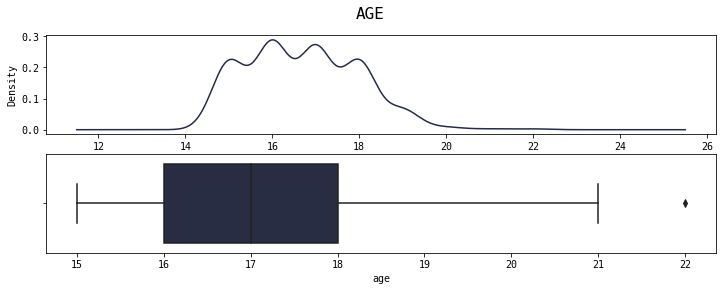

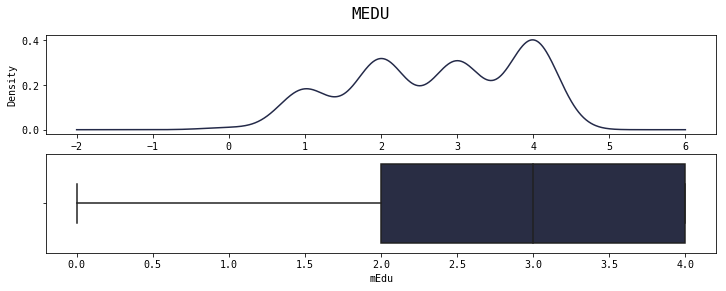

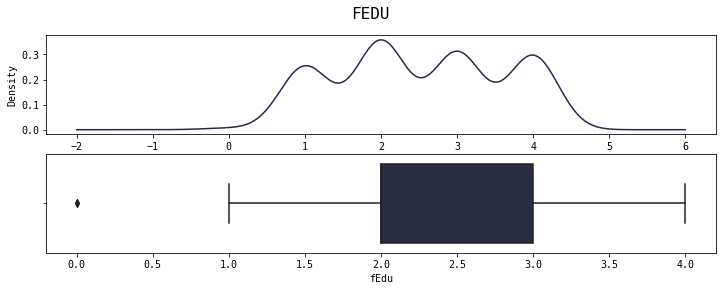

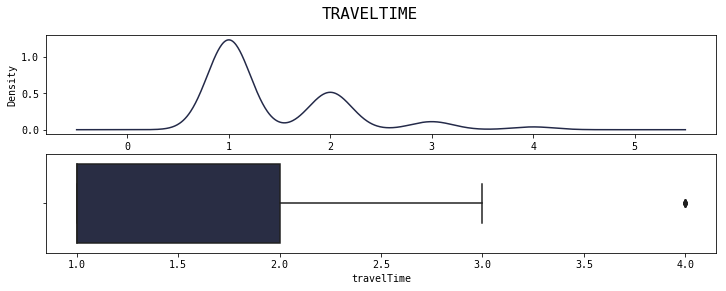

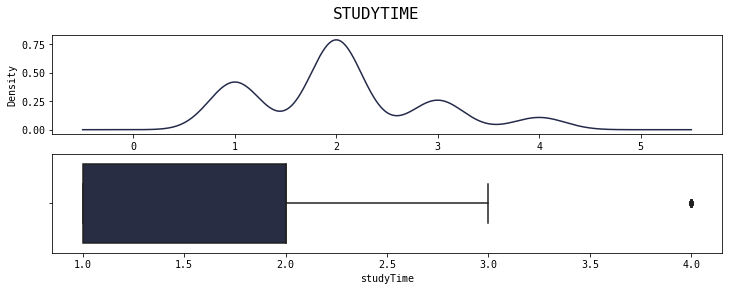

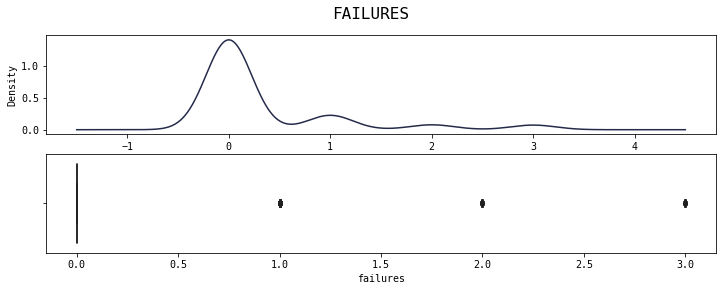

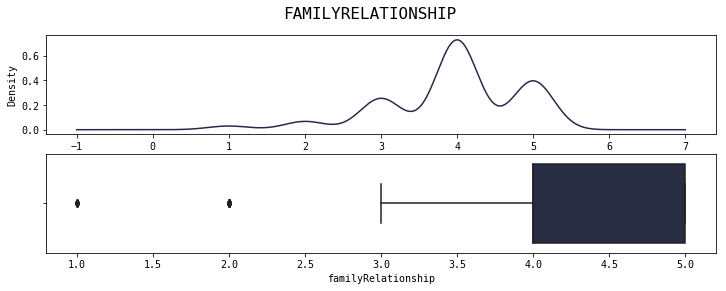

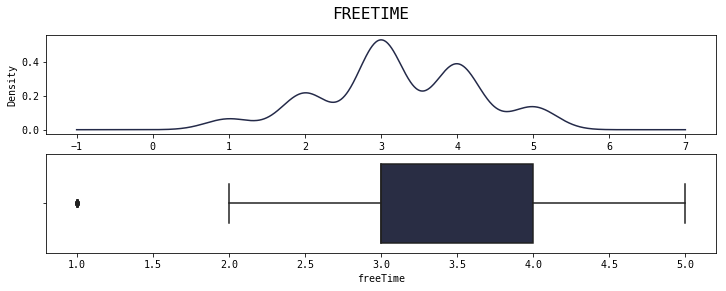

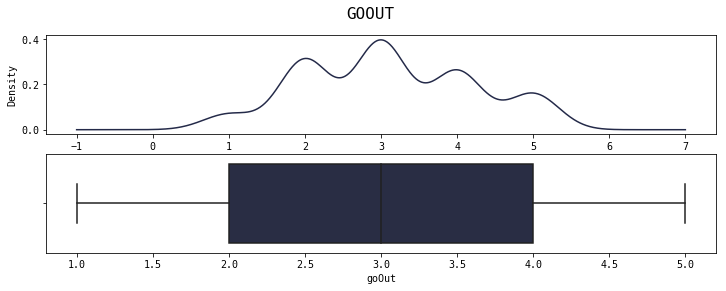

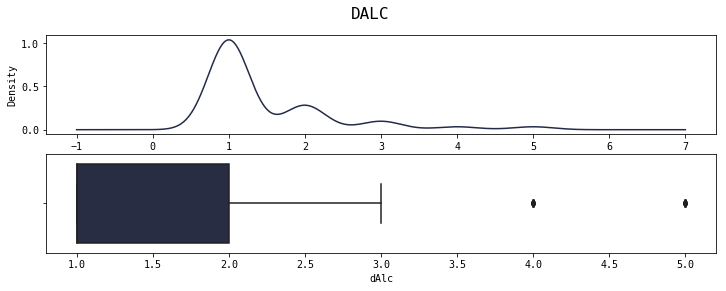

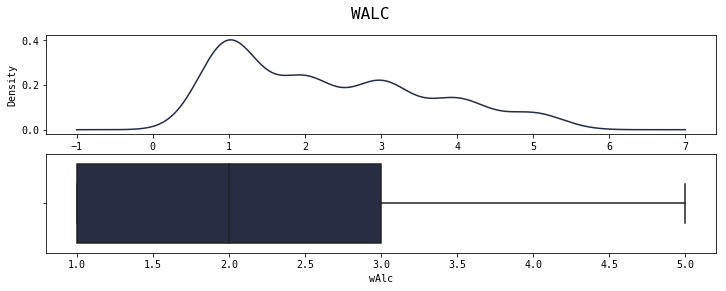

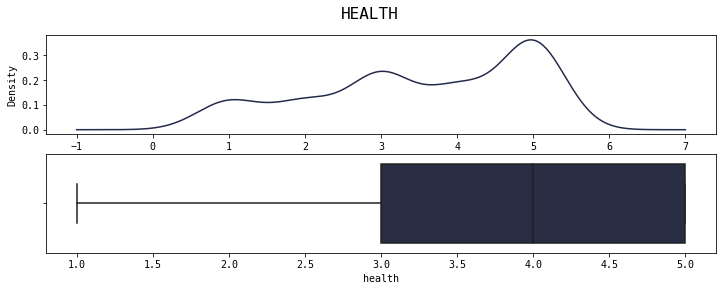

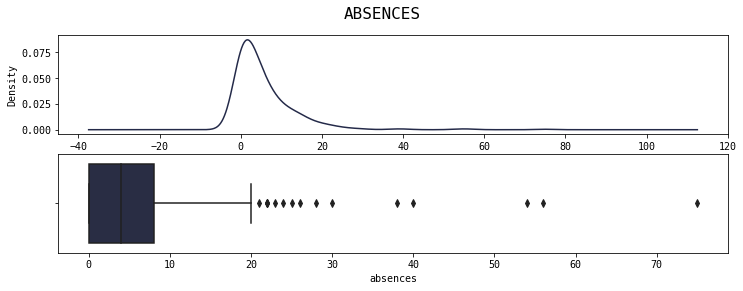

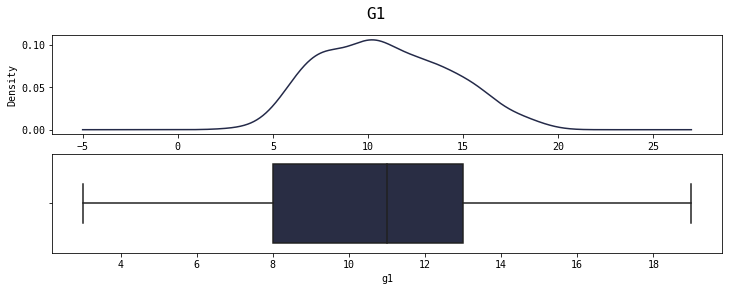

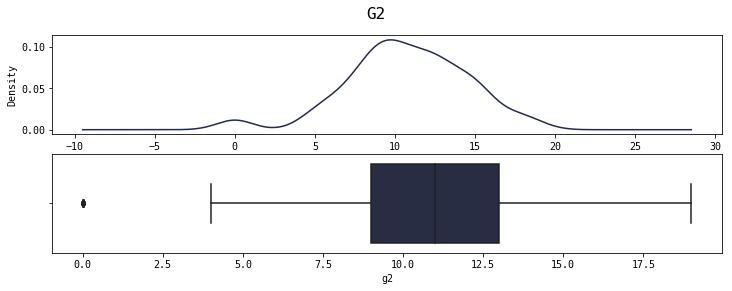

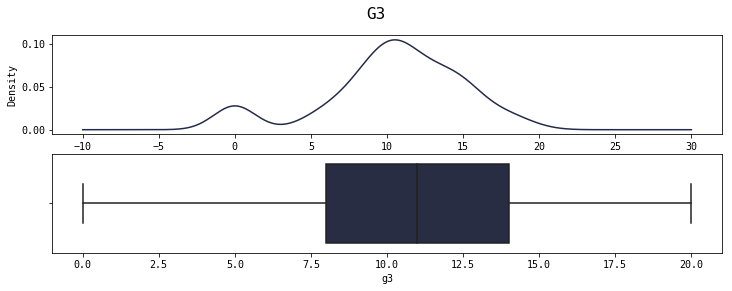

In [14]:
# KDE + Boxplot kombo
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    plt.suptitle(col.upper(), fontsize=16)
    plt.subplot(211)
    df[col].plot(kind='kde', color=MC)
    plt.subplot(212)
    sns.boxplot(df[col], color=MC)
    plt.show()
    print()

In [15]:
categorical_cols

['school',
 'sex',
 'address',
 'familySize',
 'pStatus',
 'mJob',
 'fJob',
 'reason',
 'guardian',
 'schoolSupport',
 'familySupport',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
len(categorical_cols)

17

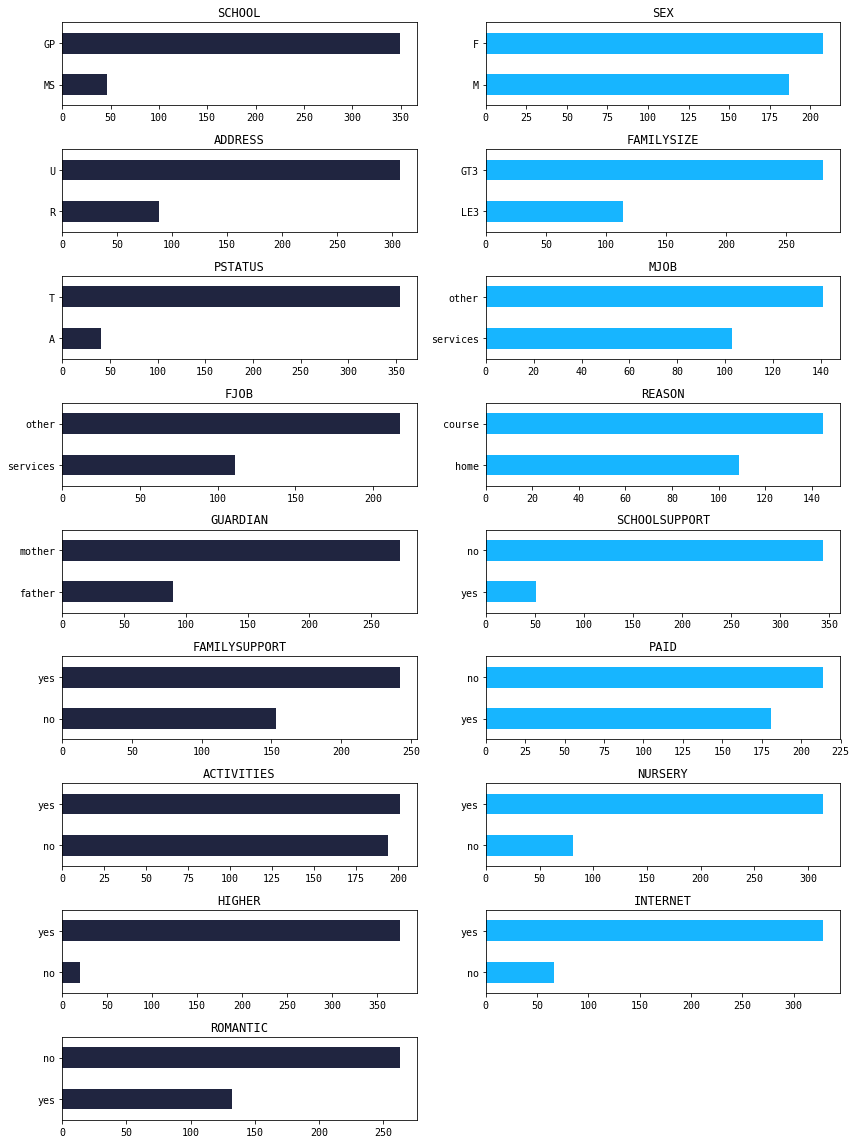

In [17]:
top_range = 2
plt.figure(figsize=(12, 16))
for i, col in enumerate(categorical_cols):
    plt.subplot(9, 2, i+1)
    df[col].value_counts()[:top_range].sort_values().plot(kind='barh', color=[colors[0] if i%2 == 0 else colors[1]])
    plt.title(col.upper(), fontsize=12)
    plt.tight_layout()

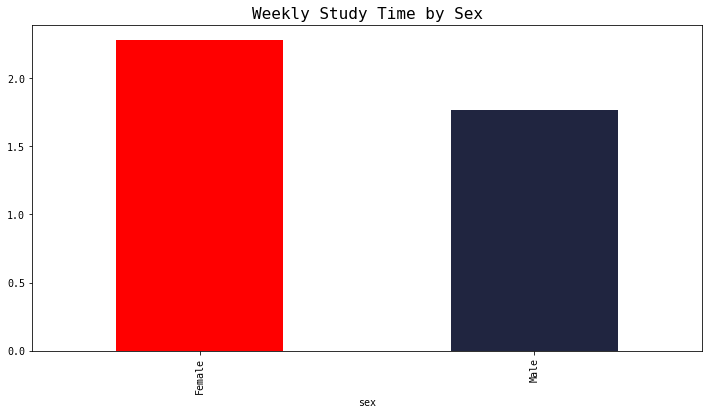

In [18]:
df.groupby('sex').studyTime.mean().plot(kind='bar', color=[colors[2], colors[0]]);
plt.title('Weekly Study Time by Sex');
plt.xticks(range(2), ['Female', 'Male']);

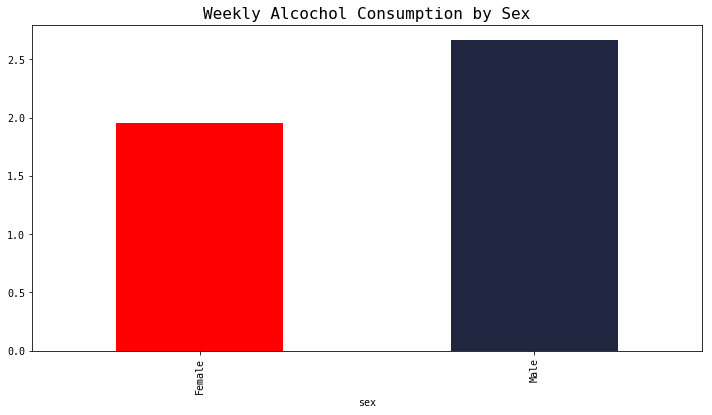

In [19]:
df.groupby('sex').wAlc.mean().plot(kind='bar', color=[colors[2], colors[0]]);
plt.title('Weekly Alcochol Consumption by Sex');
plt.xticks(range(2), ['Female', 'Male']);

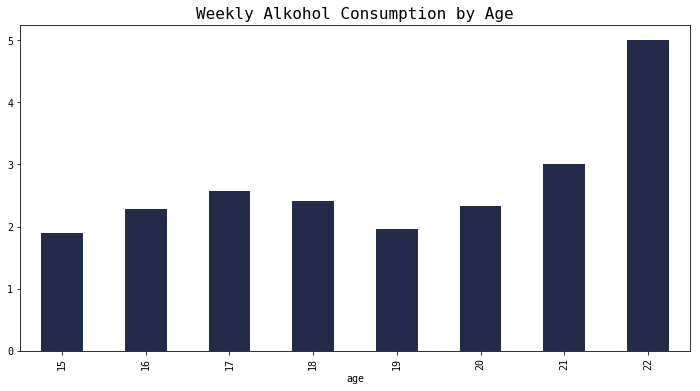

In [20]:
df.groupby('age').wAlc.mean().plot(kind='bar', color=MC)
plt.title('Weekly Alkohol Consumption by Age');

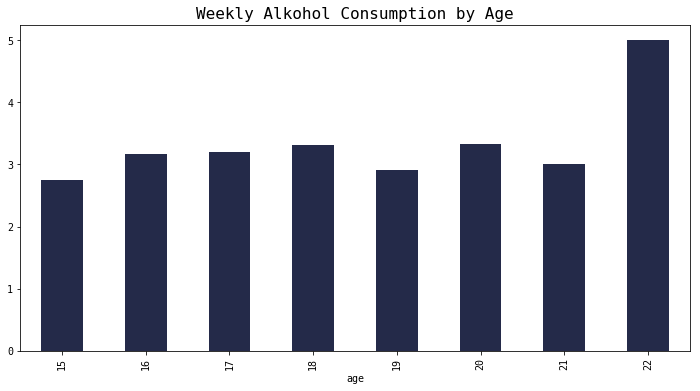

In [21]:
df.groupby('age').goOut.mean().plot(kind='bar', color=MC)
plt.title('Weekly Alkohol Consumption by Age');

In [22]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

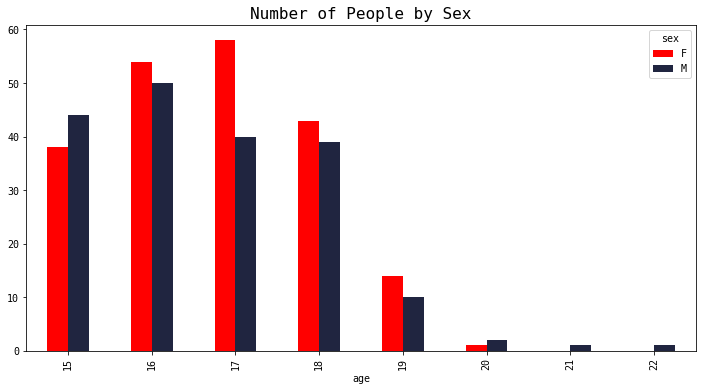

In [23]:
pd.crosstab(df.age, df.sex).plot(kind='bar', color=[colors[2], colors[0]])
plt.title('Number of People by Sex');

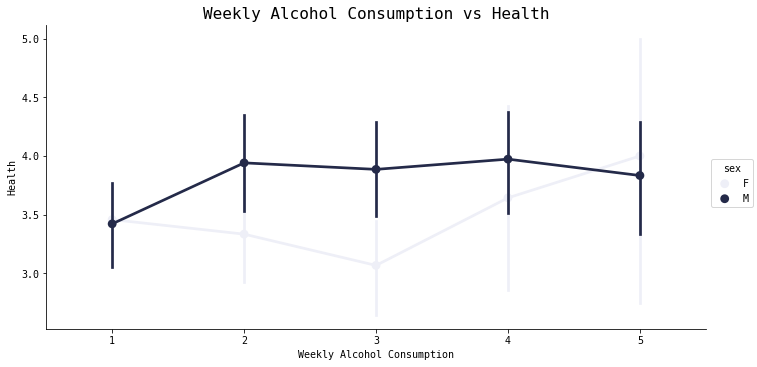

In [24]:
plot = sns.factorplot(x='wAlc', y='health', hue='sex', data=df, color=MC, size=5, aspect=2)
plot.set(xlabel='Weekly Alcohol Consumption',
         ylabel='Health',
        title='Weekly Alcohol Consumption vs Health');

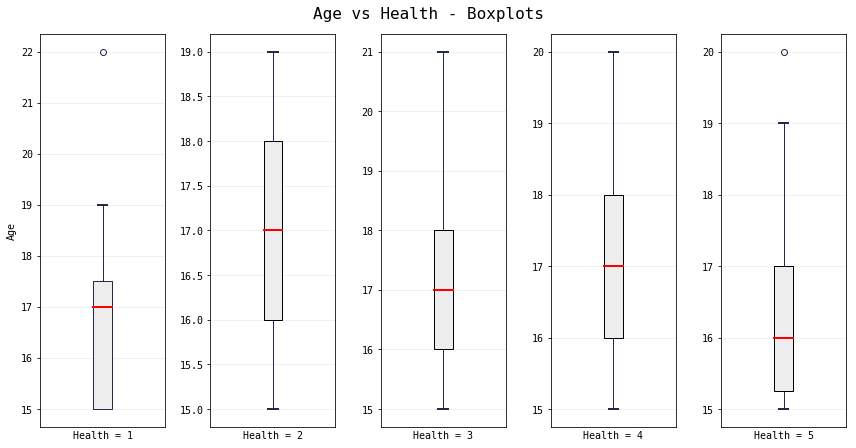

In [25]:
plt.suptitle('Age vs Health - Boxplots', y=1.03, fontsize=16)
for health in range(1, 6):
    plt.subplot(1, 5, health)
    plt.boxplot(df[df.health == health].age, **boxplot_params)
    plt.xlabel('Health = {}'.format(health))
    if health == 1:
        plt.ylabel('Age')
    plt.xticks([])
    plt.grid()
    plt.tight_layout()
plt.show()

We can achieve the same with pandas oneliner but colour management is highly messed up.

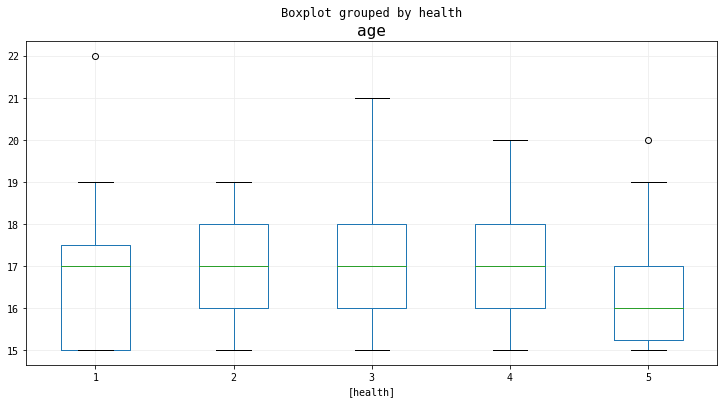

In [26]:
df[['age', 'health']].boxplot(by='health');

In [27]:
numeric_cols

Index(['age', 'mEdu', 'fEdu', 'travelTime', 'studyTime', 'failures',
       'familyRelationship', 'freeTime', 'goOut', 'dAlc', 'wAlc', 'health',
       'absences', 'g1', 'g2', 'g3'],
      dtype='object')

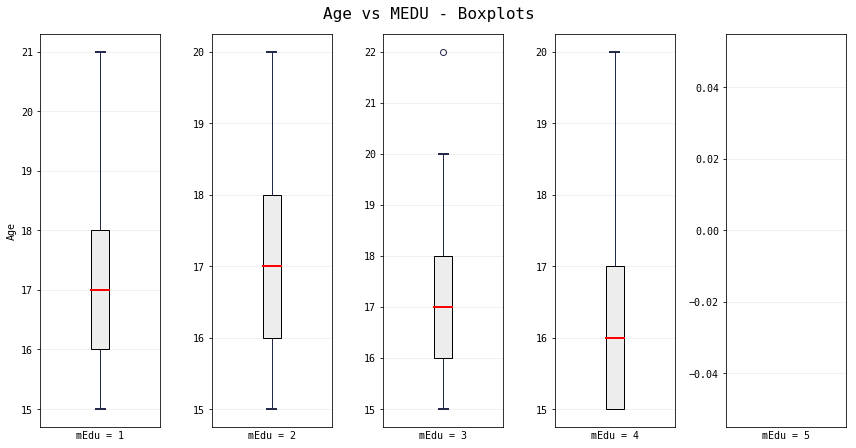

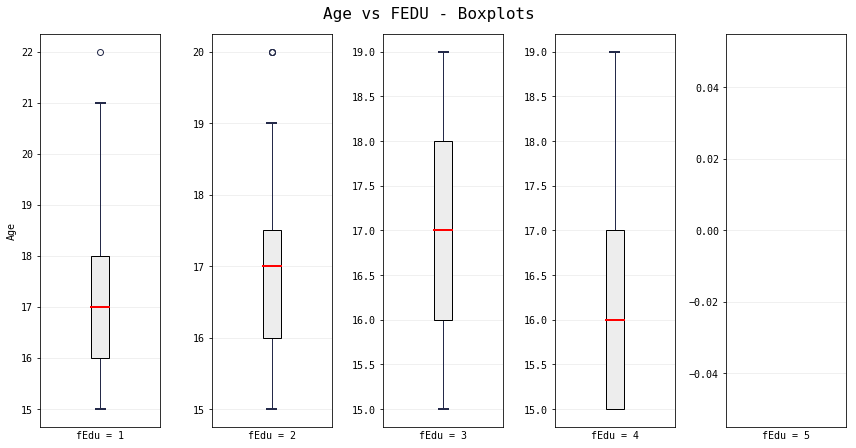

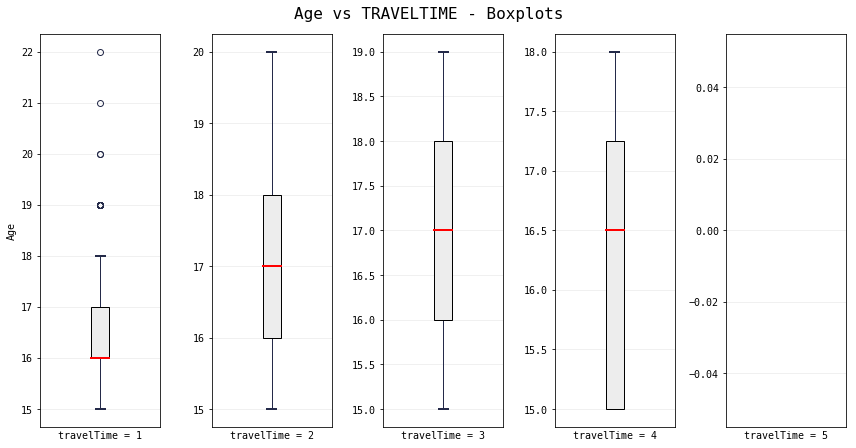

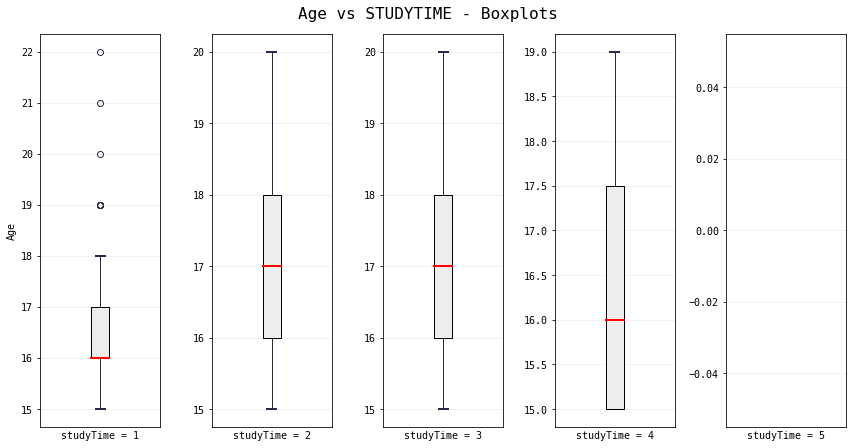

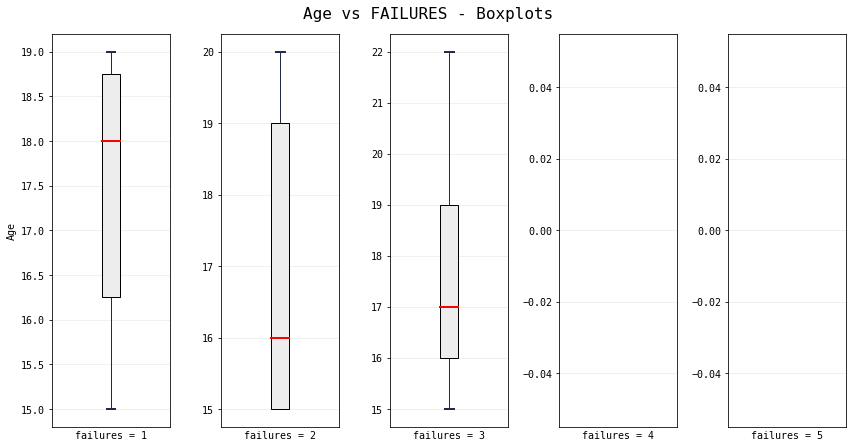

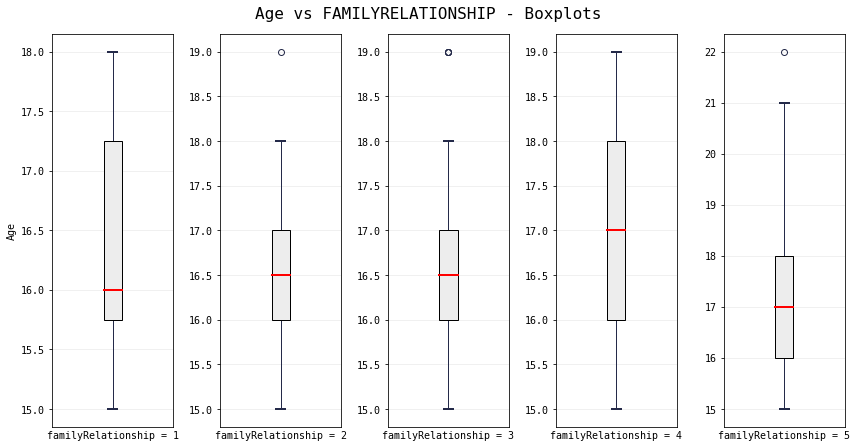

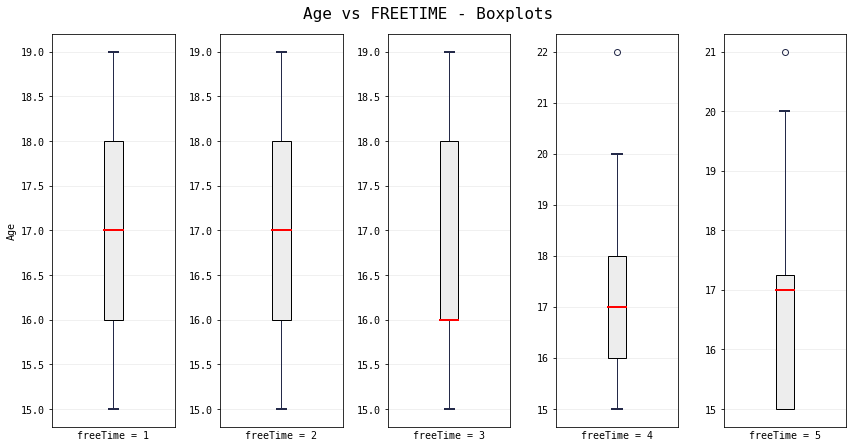

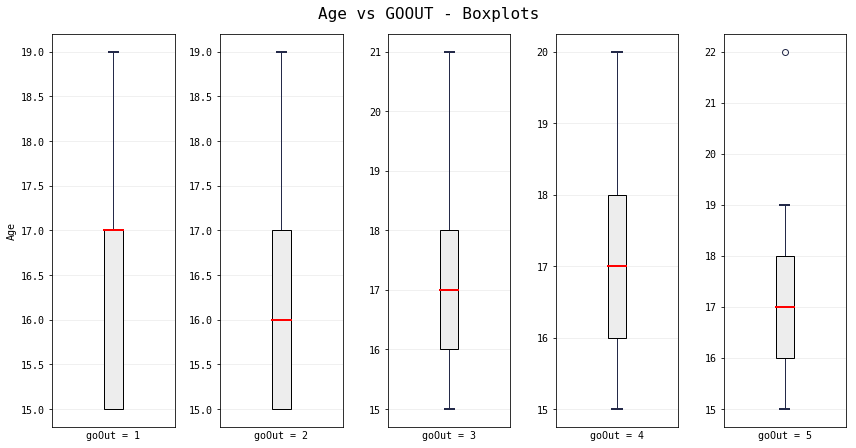

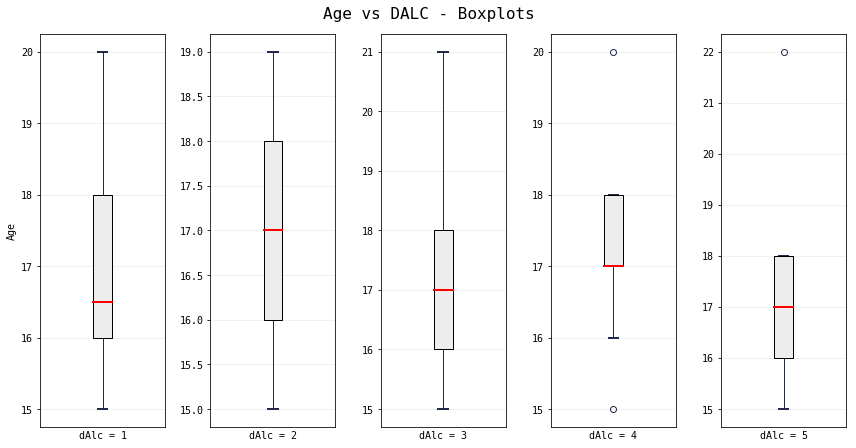

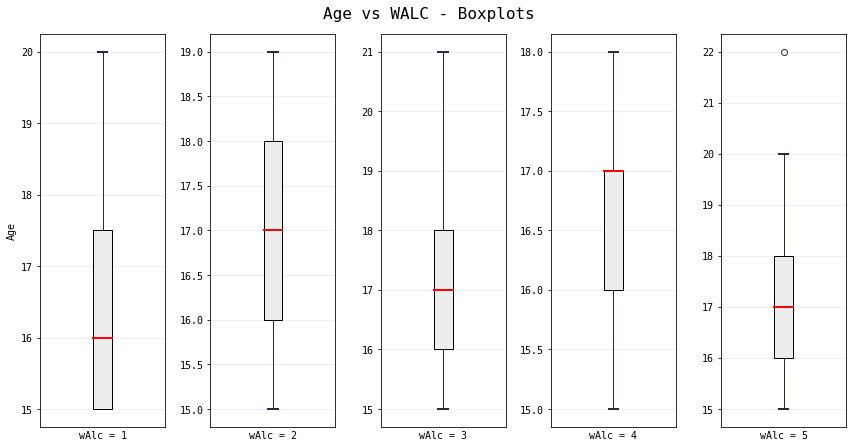

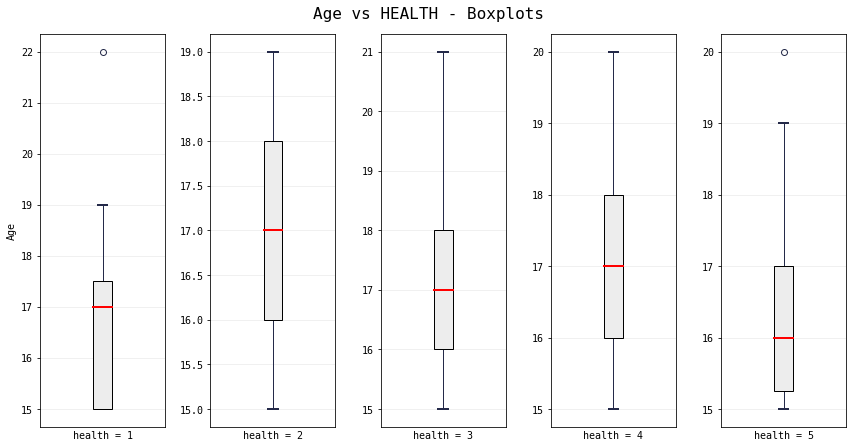

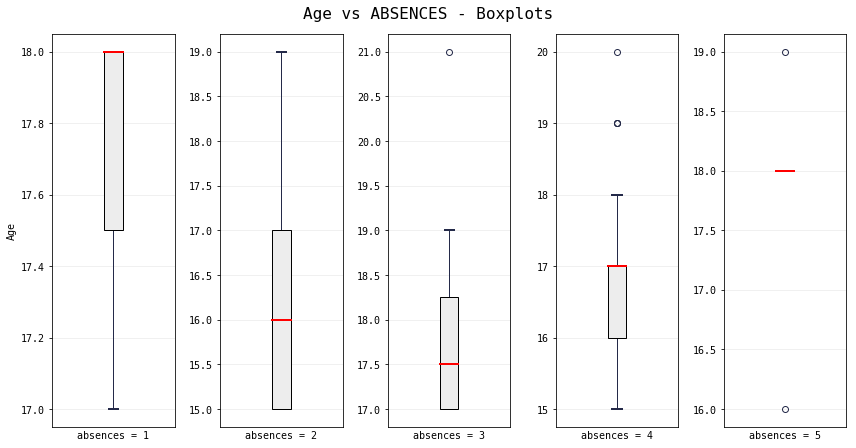

In [28]:
for col in ['mEdu', 'fEdu', 'travelTime', 'studyTime', 'failures', 'familyRelationship',
    'freeTime', 'goOut', 'dAlc', 'wAlc', 'health', 'absences']:
    plt.suptitle('Age vs {} - Boxplots'.format(col.upper()), y=1.03, fontsize=16)
    for feature in range(1, 6):
        plt.subplot(1, 5, feature)
        plt.boxplot(df[df[col] == feature].age, **boxplot_params)
        plt.xlabel('{} = {}'.format(col, feature))
        if feature == 1:
            plt.ylabel('Age')
        plt.xticks([])
        plt.grid()
        plt.tight_layout()
    plt.show()

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


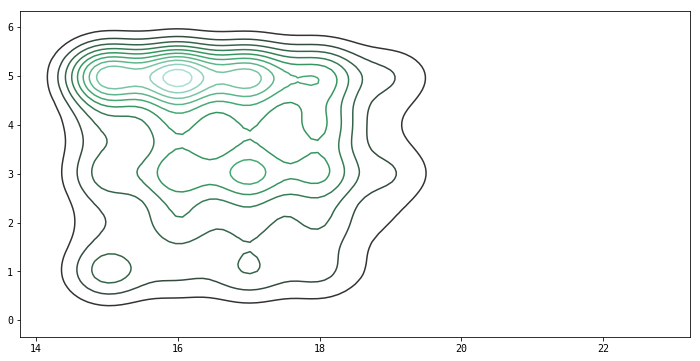

In [29]:
sns.kdeplot(df[['age', 'health']])